<h1>Final implementation of feature capture technique with adaboost and haar feature algorithm</h1>

<h3>Original paper "Robust Real-Time Face Detection" by P. Viola and M. Jones</h3>

<h3>Library import</h3>

In [1]:
import sys
sys.path.append("src")
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from src.integral_image import compute_integral_image
from src.haar_feature import HaarFeature
from src.weak_classifier import WeakClassifier
from src.adaboost import AdaBoost
from src.generate_features import generate_features



c:\Users\X\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


TypeError: Image data of dtype object cannot be converted to float

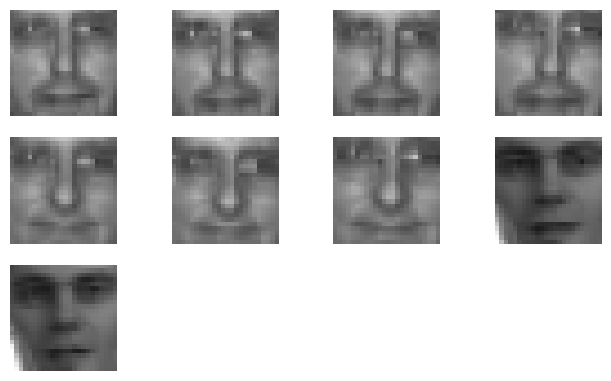

In [21]:
import cv2
fig = plt.figure(figsize=(8, 8))
h=10
w=10
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    im = cv2.imread(f'./data/face/face0000{i}.pgm')
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(im)

plt.show()

TypeError: Image data of dtype object cannot be converted to float

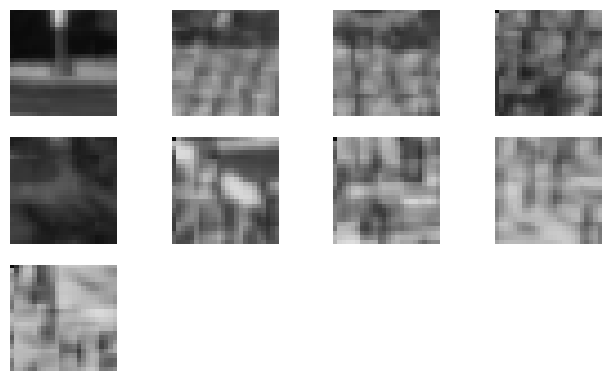

In [22]:
import cv2
fig = plt.figure(figsize=(8, 8))
h=10
w=10
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    im = cv2.imread(f'./data/non-face/B1_0000{i}.pgm')
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(im)

plt.show()

<h2>Integral Computation Step</h2>
<h3>Image processing from both face and non-face data for diversity of training process</h3>

In [2]:
face_paths = glob("data/face/*.pgm")
faces = []

for path in face_paths:
    img = Image.open(path).convert('L')    
    img_array = np.array(img)            
    integral = compute_integral_image(img_array)
    faces.append(integral)

nonface_paths = glob("data/non-face/*.pgm")
nonfaces = []

for path in nonface_paths:
    img = Image.open(path).convert('L')
    img_array = np.array(img)
    integral = compute_integral_image(img_array)
    nonfaces.append(integral)

X = faces + nonfaces
y = np.array([1] * len(faces) + [0] * len(nonfaces))


<h2>Subset Analysis</h2>
<h3>In order to optimize time-consuming training process we select 200 pgm images to speed up the process.</h3>

In [3]:
X_small = X[:200]
y_small = y[:200]

<h2>Feature Generation Step</h2>
<h3>In order to prepare features for final training, we loop through all pixels. At the end of each loop we apply Haare Algorithm and compute region sums. </h3>

In [5]:
features = generate_features()
print("Number of features:", len(features))

Number of features: 450000


In [6]:
import random

features_all = generate_features()
features = random.sample(features_all, 500)


<h2>AdaBoost algorithm</h2>

It's a machine learning ensemble algorithm that has been effectively used in image detection tasks, particularly in object detection such as face recognition. It operates by combining multiple weak classifiers—typically simple decision stumps—into a single strong classifier. AdaBoost selects the most discriminative features by iteratively focusing on examples that were misclassified in previous rounds, adjusting their weights so subsequent classifiers concentrate on harder cases. This results in a final strong classifier that is a weighted combination of a small number of the most effective weak classifiers. To enhance performance and speed, especially for real-time applications, a cascade of classifiers is used: early stages quickly eliminate negative regions of the image (e.g., areas without a face), while later stages apply more complex checks to reduce false positives. This approach, famously implemented in the Viola-Jones face detection framework, enables fast and accurate object detection by focusing computational effort only where it's most needed.

In [7]:
model = AdaBoost(num_classifiers=5)
model.train(X, y, features)


In [27]:
y_pred = []

for i in range(500):
    true_label = y[i]
    pred = model.predict(X[i])
    y_pred.append(pred)
    print(f"Example Image {i}: Prediction = {pred}, Label = {true_label}")

Example Image 0: Prediction = 1, Label = 1
Example Image 1: Prediction = 0, Label = 1
Example Image 2: Prediction = 0, Label = 1
Example Image 3: Prediction = 1, Label = 1
Example Image 4: Prediction = 0, Label = 1
Example Image 5: Prediction = 0, Label = 1
Example Image 6: Prediction = 1, Label = 1
Example Image 7: Prediction = 1, Label = 1
Example Image 8: Prediction = 1, Label = 1
Example Image 9: Prediction = 1, Label = 1
Example Image 10: Prediction = 1, Label = 1
Example Image 11: Prediction = 0, Label = 1
Example Image 12: Prediction = 1, Label = 1
Example Image 13: Prediction = 1, Label = 1
Example Image 14: Prediction = 1, Label = 1
Example Image 15: Prediction = 1, Label = 1
Example Image 16: Prediction = 0, Label = 1
Example Image 17: Prediction = 0, Label = 1
Example Image 18: Prediction = 0, Label = 1
Example Image 19: Prediction = 0, Label = 1
Example Image 20: Prediction = 1, Label = 1
Example Image 21: Prediction = 1, Label = 1
Example Image 22: Prediction = 1, Label = 

<h2>Percentage of correctly predicted values</h2>

In [36]:
round(y_pred.count(1) / 500 * 100, 2)

69.4

<h2>Percentage of incorrectly predicted values</h2>

In [37]:
round(y_pred.count(0) / 500 * 100, 2)

30.6